# Prosper Loan data exploration
## by Andy Watson

## Preliminary Wrangling

No wrangling is needed.
Udacity provided us with a clean csv file from Prosper Financials.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

The file contains data on 113,937 loans (rows) with 81 variables (columns). 

Variables include loan amount, interest rate, information about borrower's financial history, and current loan status. 

The data was last updated 2014.

### What is/are the main feature(s) of interest in your dataset?

My goal here is to find variables that can accurately predict a loan's outcome.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### Quantitative Variables:

I expect the borrower's credit rating score to accurately predict loan outcomes. This rating is created by financial institutions to assess a borrower's credit risk based on current and historical financial data about the borrower. 

Borrower income range, the loan amount, debt to income ratio, percent funded, and current and past delinquincies should also correlate strongly with loan outcomes.

I am also curious about the number of investors variable and the effect of loan term on loan outcomes.

#### Categorical Variables:

I will also explore a few categorical variables: listing category, borrower's state, and borrower occupation.

#### Loan outcome data

The loan outcome data is the current status of the loan: 

Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

In order to compare likes to likes and to avoid comparing new loans with older ones (the new ones will of course have a much lower default rate), I will choose a few loan terms and look at their current status data from the beginning of the loan term up through one year after the loan term was originally set to expire. This should render outcomes that are mostly either Cancelled, Charged Off, Completed or Defaulted.

## Preliminary Investigation of Data 

In [7]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
loan.info

<bound method DataFrame.info of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [12]:
loan.value_counts()

Series([], dtype: int64)

In [17]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [19]:
loan['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [20]:
loan.groupby('LoanStatus').describe()

ListingNumber                                          \
                               count           mean            std       min   
LoanStatus                                                                     
Cancelled                        5.0   87767.200000  180178.635718     908.0   
Chargedoff                   11992.0  364864.921364  197898.726241     156.0   
Completed                    38074.0  388419.870121  213516.255126       4.0   
Current                      56576.0  876833.378199  210349.150769  464139.0   
Defaulted                     5018.0  232427.769829  189488.459787      99.0   
FinalPaymentInProgress         205.0  747528.004878  202541.470503  489610.0   
Past Due (1-15 days)           806.0  710421.168734  163273.523789  471640.0   
Past Due (16-30 days)          265.0  703710.335849  150930.601944  492772.0   
Past Due (31-60 days)          363.0  712121.658402  154116.557782  491495.0   
Past Due (61-90 days)          313.0  690544.562300  136034.292526  488826.0   
Past Due (91-120 days)         304.0  669112.799342  120903.929615  482134.0   
Past Due (>120 days)            16.0  649402.625000  111548.326149  517786.0   

                                                                       Term  \
                              25%       50%         75%        max    count   
LoanStatus                                                                    
Cancelled                 7646.00    8912.0    11364.00   410006.0      5.0   
Chargedoff              188513.75  369917.0   534035.50   932346.0  11992.0   
Completed               221154.50  425475.5   529267.50  1204824.0  38074.0   
Current                 694592.50  883436.0  1057011.50  1255725.0  56576.0   
Defaulted                69063.75  178389.0   367876.25  1099553.0   5018.0   
FinalPaymentInProgress  569532.00  719603.0   908166.00  1240719.0    205.0   
Past Due (1-15 days)    575699.50  662199.5   830913.00  1184124.0    806.0   
Past Due (16-30 days)   588835.00  668132.0   801508.00  1123445.0    265.0   
Past Due (31-60 days)   583373.00  665787.0   840125.00  1112078.0    363.0   
Past Due (61-90 days)   591478.00  651766.0   788166.00  1069344.0    313.0   
Past Due (91-120 days)  573197.50  640280.0   765599.25  1016433.0    304.0   
Past Due (>120 days)    548950.25  630783.5   766740.50   829185.0     16.0   

                                   ... InvestmentFromFriendsAmount            \
                             mean  ...                         75%       max   
LoanStatus                         ...                                         
Cancelled               36.000000  ...                         0.0      0.00   
Chargedoff              38.029353  ...                         0.0  12500.00   
Completed               36.613962  ...                         0.0  25000.00   
Current                 44.511736  ...                         0.0   3000.00   
Defaulted               36.841770  ...                         0.0   8200.00   
FinalPaymentInProgress  39.278049  ...                         0.0    250.00   
Past Due (1-15 days)    43.354839  ...                         0.0    845.00   
Past Due (16-30 days)   43.698113  ...                         0.0    525.58   
Past Due (31-60 days)   44.066116  ...                         0.0      0.00   
Past Due (61-90 days)   43.974441  ...                         0.0      0.00   
Past Due (91-120 days)  44.605263  ...                         0.0      0.00   
Past Due (>120 days)    46.500000  ...                         0.0      0.00   

                       Investors                                            \
                           count        mean         std  min    25%   50%   
LoanStatus                                                                   
Cancelled                    5.0   24.600000   22.678183  6.0   7.00  23.0   
Chargedoff               11992.0   96.110657  102.788349  1.0  28.00  61.0   
Completed                38074.0  108.223854 

In [24]:
loan.groupby('LoanStatus').mean()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanStatus,,,,,,,,,,,,,,,,,,,,,
Cancelled,87767.200000,36.000000,0.205826,0.184400,0.178400,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.600000
Chargedoff,364864.921364,38.029353,0.257752,0.235397,0.224656,0.218423,0.116322,0.123379,2.882871,5.390742,...,-46.863075,-49.842038,4662.518525,4608.299671,136.912133,0.997808,0.085474,0.036191,32.136696,96.110657
Completed,388419.870121,36.613962,0.208781,0.186422,0.176595,0.163086,0.086753,0.102430,3.907648,6.536513,...,-57.650019,-5.104060,0.000000,0.000000,0.000000,0.998702,0.092452,0.051584,36.283888,108.223854
Current,876833.378199,44.511736,0.213740,0.183771,0.173771,0.163595,0.073381,0.090227,4.288426,5.837952,...,-55.021413,-1.852073,0.000000,0.000000,0.000000,0.998664,0.009191,0.002209,0.585536,57.140148
Defaulted,232427.769829,36.841770,0.238925,0.223077,0.212097,0.209420,0.111961,0.123416,3.015920,5.619900,...,-39.681192,-116.638448,4761.624705,4459.202419,243.689113,0.999261,0.075528,0.028298,16.612698,100.659426
FinalPaymentInProgress,747528.004878,39.278049,0.229558,0.196960,0.186960,0.176569,0.083253,0.093316,3.956098,5.751220,...,-68.433366,-4.627024,0.000000,0.000000,0.000000,0.996479,0.009756,0.014634,2.560878,76.751220
Past Due (1-15 days),710421.168734,43.354839,0.263828,0.230797,0.220797,0.208204,0.097967,0.110621,3.373449,5.042184,...,-79.069007,-72.582581,0.000000,0.000000,0.000000,0.997539,0.014888,0.002481,1.166253,66.997519
Past Due (16-30 days),703710.335849,43.698113,0.268445,0.235258,0.225258,0.211939,0.100970,0.110969,3.275472,4.969811,...,-74.676415,-83.735585,0.000000,0.000000,0.000000,0.997878,0.011321,0.011321,3.517283,73.509434
Past Due (31-60 days),712121.658402,44.066116,0.265734,0.232978,0.222978,0.210208,0.099552,0.110655,3.327824,5.110193,...,-70.067135,-64.730523,0.000000,0.000000,0.000000,0.997508,0.013774,0.000000,0.000000,62.652893


In [25]:
loan.groupby('Term').describe()

ListingNumber                                                     \
             count           mean            std       min        25%   
Term                                                                    
12          1614.0  596105.513631   74617.647800  319654.0  534315.75   
36         87778.0  569803.789663  335151.727576       4.0  315996.00   
60         24545.0  837688.360114  203513.631937  464735.0  653639.00   

                                      BorrowerAPR            ...  \
           50%         75%        max       count      mean  ...   
Term                                                         ...   
12    589994.5   658609.25   741982.0      1614.0  0.216223  ...   
36    534666.5   841837.75  1255725.0     87753.0  0.219431  ...   
60    827167.0  1009196.00  1255149.0     24545.0  0.216843  ...   

     InvestmentFromFriendsAmount           Investors                         \
                             75%       max     count       mean         std   
Term                                                                          
12                           0.0   2975.00    1614.0  65.087980   64.473477   
36                           0.0  25000.00   87778.0  83.671227  104.153692   
60                           0.0  10593.67   24545.0  70.057486  101.229366   

                                       
      min    25%   50%    75%     max  
Term                                   
12    1.0  29.25  47.0   75.0   504.0  
36    1.0   7.00  48.0  117.0  1189.0  
60    1.0   1.00  17.0  112.0   714.0  

[3 rows x 480 columns]

In [26]:
loan.groupby('Term').mean()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,,,,,,,,,,,,,,,,,,,,,
12,596105.513631,0.216223,0.150081,0.140081,0.134658,0.074130,0.060680,4.326100,6.563546,4.915737,...,-21.124318,-8.580409,138.233482,128.697193,2.100372,0.999077,0.048947,0.014250,4.907200,65.087980
36,569803.789663,0.219431,0.193486,0.183404,0.167792,0.084158,0.094762,3.965397,5.868115,2.684294,...,-50.221543,-16.660683,772.827297,749.617007,31.304558,0.998857,0.058625,0.029506,21.047365,83.671227
60,837688.360114,0.216843,0.192991,0.182990,0.172976,0.071499,0.101517,4.311061,6.105724,2.954940,...,-73.042744,-5.967816,478.566374,473.880975,4.621747,0.997574,0.010063,0.002444,1.235570,70.057486


In [36]:
loan['ListingCreationDate'].dtype

dtype('O')

In [4]:
years = loan.ListingCreationDate.apply(lambda x: x[:4])
print(years)

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: ListingCreationDate, Length: 113937, dtype: object


In [5]:
loan.groupby('ListingCreationDate').apply(lambda x: x[:4])

KeyboardInterrupt: 

In [32]:
# change the ListingCreationDate column to datetime
loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])

In [10]:
dates_loan = loan

In [31]:
dates_loan['ListingCreationDate'] = loan['ListingCreationDate'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
dates_loan.groupby('ListingCreationDate').count()


,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingCreationDate,,,,,,,,,,,,,,,,,,,,,
2005,23,23,23,23,23,23,0,23,23,0,...,23,23,23,23,23,23,23,23,23,23
2006,6213,6213,6213,6213,6213,6213,6211,6213,6213,0,...,6213,6213,6213,6213,6213,6213,6213,6213,6213,6213
2007,11557,11557,11544,11557,11557,11557,11557,11557,11557,0,...,11557,11557,11557,11557,11557,11557,11557,11557,11557,11557
2008,11263,11263,11160,11263,11263,11263,11263,11263,11263,0,...,11263,11263,11263,11263,11263,11263,11263,11263,11263,11263
2009,2206,2206,13,2206,2206,2206,2206,2206,2206,2178,...,2206,2206,2206,2206,2206,2206,2206,2206,2206,2206
2010,5530,5530,0,5530,5530,5489,5530,5530,5530,5530,...,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530
2011,11442,11442,0,11442,11442,7700,11442,11442,11442,11442,...,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442
2012,19556,19556,0,19556,19556,8032,19556,19556,19556,19556,...,19556,19556,19556,19556,19556,19556,19556,19556,19556,19556
2013,35413,35413,0,35413,35413,2544,35413,35413,35413,35413,...,35413,35413,35413,35413,35413,35413,35413,35413,35413,35413


## Univariate Exploration

First: What is the distribution of loan outcomes?



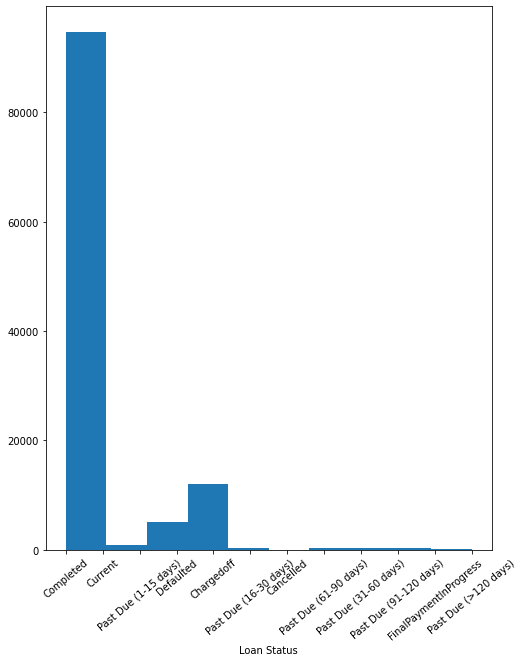

In [25]:
plt.figure(figsize=[8, 10])
plt.hist(data = loan, x = 'LoanStatus')
plt.xlabel('Loan Status')
plt.xticks(rotation=40)
plt.show()

The Completed category dwarfs all other categories.

So I will see what happens with a log transformation

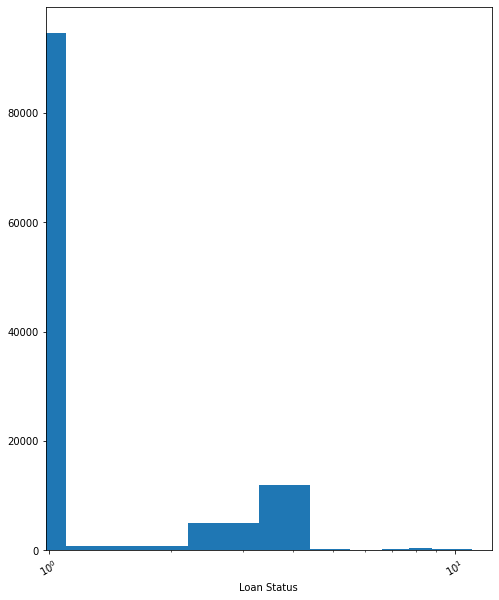

In [24]:
# the completed dwarfs all other categories
# So I will see what happens with a log transformation
plt.figure(figsize=[8, 10])
plt.hist(data = loan, x = 'LoanStatus')
plt.xlabel('Loan Status')
plt.xscale('log')
plt.xticks(rotation=30)
plt.show()


OK, that didn't change anything.

I think I should limit my investigations to 2008.

Because all those loans terms should've been completed by 2014 (the longest term is 5 years and 2013-5=2008).

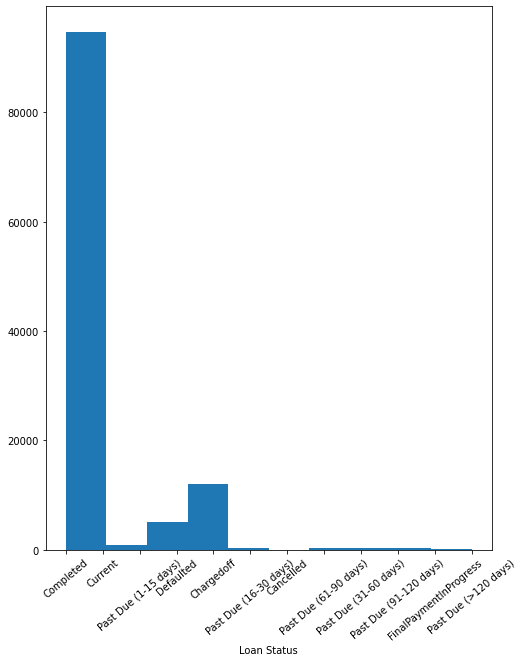

In [33]:
loans_to_2008 = loan[loan['ListingCreationDate'].dt.year <= 2008]

plt.figure(figsize=[8, 10])
plt.hist(data = loan, x = 'LoanStatus')
plt.xlabel('Loan Status')
plt.xticks(rotation=40)
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!